In [1]:
%matplotlib inline

import pathlib

import numpy as np
import matplotlib.pyplot as plt

from rtlsdr_receiver_flowgraph import rtlsdr_receiver_flowgraph

# Some nice defaults for figures
plt.rcParams['figure.figsize'] = (7, 3.5)
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
# Example of how to run the flowgraph
fg = rtlsdr_receiver_flowgraph(duration=3, iq_file_output='/tmp/reu-recording')
fg.run()

gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.12.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
[INFO] [UHD] linux; GNU C++ version 15.1.1 20250425; Boost_108800; DPDK_24.11; UHD_4.8.0.makepkg-0-g308126a4
Found Rafael Micro R820T tuner
Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
[R82XX] PLL not locked!


log :info: Generating /tmp/reu-recording.sigmf-meta, writing SigMF data to /tmp/reu-recording.sigmf-data


In [3]:
# We have access to the Vector Sink as a Python object
fg.spectrum_vector_sink

In [4]:
# We can fetch the data
# Documentation:
# https://wiki.gnuradio.org/index.php/Vector_Sink
# https://github.com/gnuradio/gnuradio/blob/main/gr-blocks/include/gnuradio/blocks/vector_sink.h
fg.spectrum_vector_sink.data()

[0.2790778577327728,
 0.2647233307361603,
 0.26205381751060486,
 0.25459766387939453,
 0.21868596971035004,
 0.20226217806339264,
 0.22915339469909668,
 0.23442350327968597,
 0.21234318614006042,
 0.2285197228193283,
 0.20935706794261932,
 0.2351490706205368,
 0.2383086085319519,
 0.2130098044872284,
 0.19631023705005646,
 0.25127658247947693,
 0.2596929371356964,
 0.20289763808250427,
 0.19972386956214905,
 0.21391862630844116,
 0.2140468806028366,
 0.20932897925376892,
 0.2125621885061264,
 0.23736003041267395,
 0.21548698842525482,
 0.18510499596595764,
 0.1871877759695053,
 0.1896364837884903,
 0.23526433110237122,
 0.2560504674911499,
 0.2200828194618225,
 0.21712283790111542,
 0.23154935240745544,
 0.2335427701473236,
 0.22929911315441132,
 0.20228852331638336,
 0.18031199276447296,
 0.18390746414661407,
 0.1967838555574417,
 0.17528899013996124,
 0.1892259567975998,
 0.20773449540138245,
 0.1997576653957367,
 0.19072453677654266,
 0.18685251474380493,
 0.20779898762702942,
 0.21

In [5]:
# Convert spectrum sink data to a numpy array
spectrum = np.array(fg.spectrum_vector_sink.data()).reshape(-1, fg.nfft)
spectrum.shape

(2, 65536)

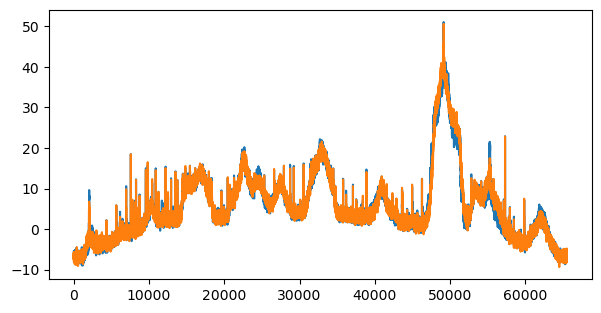

In [6]:
plt.plot(10 * np.log10(spectrum[0]))
plt.plot(10 * np.log10(spectrum[1]))

In [7]:
# Destroy the flowgraph to release access to the RTL-SDR
del fg

In [8]:
# An example "observation"

frequencies_to_scan = [98e6, 95.5e6, 117.5e6, 425e6, 801e6, 935e6, 1090e6]
freq_xlating_freqs = [800e3, 300e3, -200e3, -250e3, 300e3, 200e3, 0]
duration = 10

spectrum_data = {}
output_dir = pathlib.Path('/tmp/observation')
output_dir.mkdir(exist_ok=True)

for rf_freq, xlating_freq in zip(frequencies_to_scan, freq_xlating_freqs):
    print(f'Receiving on {rf_freq * 1e-6:.3f} MHz (tune to {xlating_freq*1e-3:.1f} kHz)')
    iq_file = str(output_dir / f'iq_data_{rf_freq * 1e-6:.3f}')
    fg = rtlsdr_receiver_flowgraph(
        duration=duration, frequency=rf_freq, freq_xlating_frequency=xlating_freq,
        iq_file_output=iq_file)
    fg.run()
    spectrum_data[rf_freq] = np.array(fg.spectrum_vector_sink.data()).reshape(-1, fg.nfft)
    del fg

Receiving on 98.000 MHz (tune to 800.0 kHz)
log :info: Generating /tmp/observation/iq_data_98.000.sigmf-meta, writing SigMF data to /tmp/observation/iq_data_98.000.sigmf-data


gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.12.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
[R82XX] PLL not locked!


Receiving on 95.500 MHz (tune to 300.0 kHz)
log :info: Generating /tmp/observation/iq_data_95.500.sigmf-meta, writing SigMF data to /tmp/observation/iq_data_95.500.sigmf-data


gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.12.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
[R82XX] PLL not locked!


Receiving on 117.500 MHz (tune to -200.0 kHz)
log :info: Generating /tmp/observation/iq_data_117.500.sigmf-meta, writing SigMF data to /tmp/observation/iq_data_117.500.sigmf-data


gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.12.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
[R82XX] PLL not locked!


Receiving on 425.000 MHz (tune to -250.0 kHz)
log :info: Generating /tmp/observation/iq_data_425.000.sigmf-meta, writing SigMF data to /tmp/observation/iq_data_425.000.sigmf-data


gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.12.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
[R82XX] PLL not locked!


Receiving on 801.000 MHz (tune to 300.0 kHz)
log :info: Generating /tmp/observation/iq_data_801.000.sigmf-meta, writing SigMF data to /tmp/observation/iq_data_801.000.sigmf-data


gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.12.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
[R82XX] PLL not locked!


Receiving on 935.000 MHz (tune to 200.0 kHz)
log :info: Generating /tmp/observation/iq_data_935.000.sigmf-meta, writing SigMF data to /tmp/observation/iq_data_935.000.sigmf-data


gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.12.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
[R82XX] PLL not locked!


Receiving on 1090.000 MHz (tune to 0.0 kHz)
log :info: Generating /tmp/observation/iq_data_1090.000.sigmf-meta, writing SigMF data to /tmp/observation/iq_data_1090.000.sigmf-data


gr-osmosdr 0.2.0.0 (0.2.0) gnuradio 3.10.12.0
built-in source types: file rtl rtl_tcp uhd hackrf bladerf rfspace airspy soapy redpitaya 
Using device #0 Realtek RTL2838UHIDIR SN: 00000001
Found Rafael Micro R820T tuner
[R82XX] PLL not locked!
[R82XX] PLL not locked!


In [9]:
spectrum_data

{98000000.0: array([[0.19985262, 0.24456742, 0.25784627, ..., 0.23187797, 0.19899929,
         0.16985977],
        [0.24138658, 0.23351657, 0.18291715, ..., 0.20362501, 0.20835304,
         0.22251996],
        [0.20726535, 0.21183042, 0.17946064, ..., 0.17197828, 0.19523457,
         0.20423009],
        ...,
        [0.23655504, 0.20686643, 0.23245876, ..., 0.16917962, 0.20138557,
         0.27398846],
        [0.24165316, 0.20792842, 0.21994241, ..., 0.18321797, 0.19891937,
         0.21293348],
        [0.23841769, 0.27170867, 0.22537354, ..., 0.14548922, 0.17014064,
         0.20950076]], shape=(9, 65536)),
 95500000.0: array([[0.41601574, 0.49043787, 0.45695564, ..., 0.37156439, 0.33050117,
         0.32768962],
        [0.37952173, 0.30099174, 0.33132634, ..., 0.4032729 , 0.40017641,
         0.46527106],
        [0.41738123, 0.4333159 , 0.41690484, ..., 0.3972986 , 0.40118679,
         0.38870648],
        ...,
        [0.34028569, 0.29622659, 0.29599124, ..., 0.51174605, 0.45

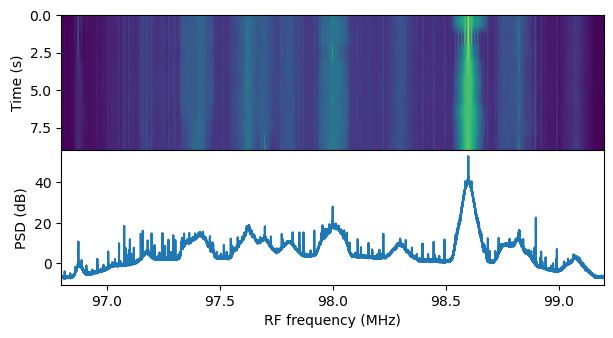

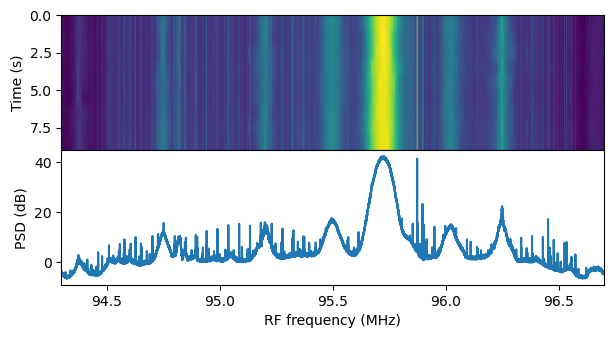

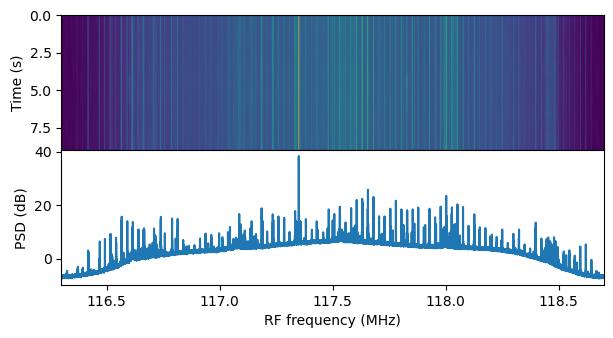

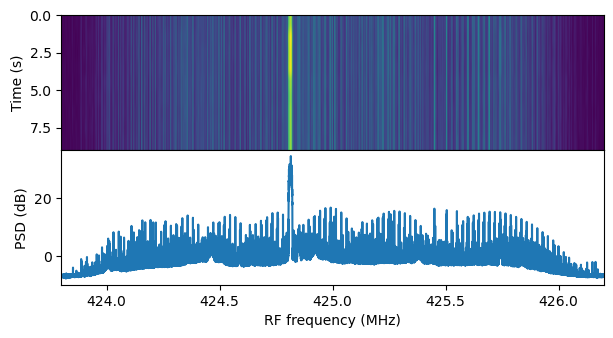

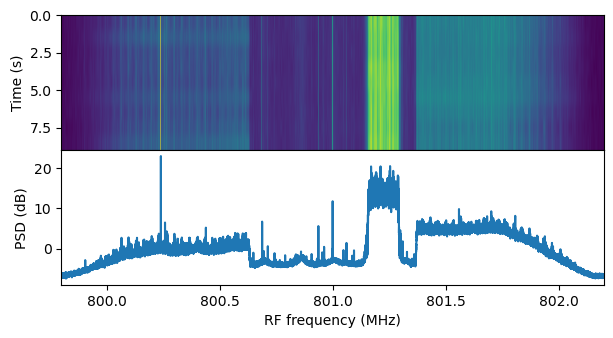

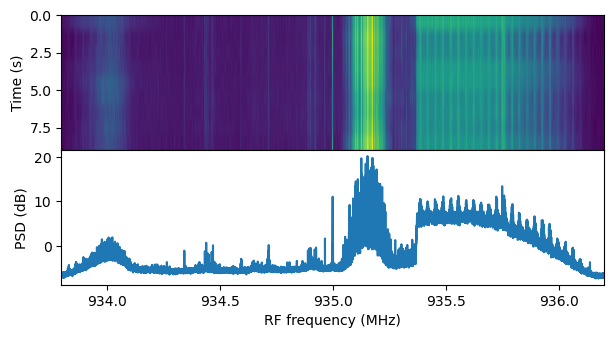

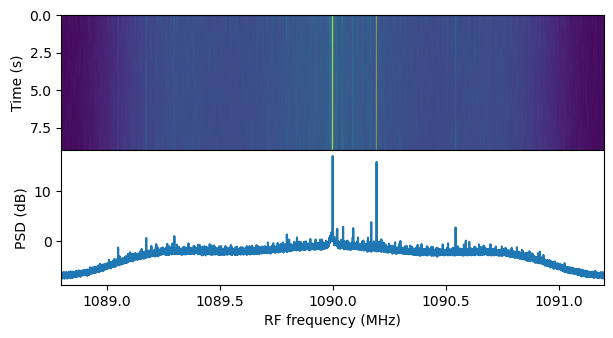

In [10]:
# Display the results
samp_rate = 2.4e6
waterfall_freq_reduce = 64
for freq, data in spectrum_data.items():  
    freq_axis = np.fft.fftshift(np.fft.fftfreq(data.shape[1], 1 / samp_rate))
    fig, axs = plt.subplots(2, 1, sharex=True)
    waterfall = np.max(data.reshape(data.shape[0], -1, waterfall_freq_reduce), axis=-1)
    axs[0].imshow(10*np.log10(waterfall), aspect='auto',
                  extent=[1e-6 * (freq - samp_rate/2), 1e-6 * (freq + samp_rate/2),
                          data.shape[0], 0])
    axs[1].plot(1e-6 * (freq_axis + freq), 10*np.log10(np.average(data, axis=0)))
    plt.subplots_adjust(hspace=0)
    axs[1].set_xlabel('RF frequency (MHz)')
    axs[1].set_ylabel('PSD (dB)')
    axs[0].set_ylabel('Time (s)')